In [4]:
import pypsa
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

# Loading networks 

In [9]:
n = pypsa.Network("results/networks/elec_s_6_ec_lcopt_Co2L-24H.nc")
n37 = pypsa.Network("networks/elec_s_37.nc")

INFO:pypsa.io:Imported network elec_s_6_ec_lcopt_Co2L-24H.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores
INFO:pypsa.io:Imported network elec_s_37.nc has buses, carriers, generators, lines, links, loads, storage_units


/home/iegor/miniconda3/envs/pypsa-eur/lib/python3.9/site-packages/pypsa/plot.py:149: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection=projection)


(<matplotlib.collections.PatchCollection at 0x7f544a71e190>,
 <matplotlib.collections.LineCollection at 0x7f544a6c4640>)

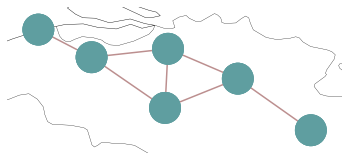

In [10]:
n.plot()

(<matplotlib.collections.PatchCollection at 0x7f544a6b8a30>,
 <matplotlib.collections.LineCollection at 0x7f544a69df70>)

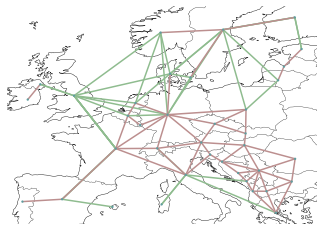

In [11]:
n37.plot()

# Exploring components

In [12]:
for c in n.iterate_components(list(n.components.keys())[2:]):
    print("Component '{}' has {} entries".format(c.name, len(c.df)))

Component 'Bus' has 18 entries
Component 'Carrier' has 9 entries
Component 'GlobalConstraint' has 1 entries
Component 'Line' has 7 entries
Component 'LineType' has 31 entries
Component 'TransformerType' has 14 entries
Component 'Link' has 24 entries
Component 'Load' has 6 entries
Component 'Generator' has 27 entries
Component 'Store' has 12 entries


In [13]:
for c in n37.iterate_components(list(n37.components.keys())[2:]):
    print("Component '{}' has {} entries".format(c.name, len(c.df)))

Component 'Bus' has 37 entries
Component 'Carrier' has 15 entries
Component 'Line' has 52 entries
Component 'LineType' has 31 entries
Component 'TransformerType' has 14 entries
Component 'Link' has 37 entries
Component 'Load' has 37 entries
Component 'Generator' has 258 entries
Component 'StorageUnit' has 50 entries


## Temporal resolution

In [19]:
n.snapshots[:10]
# remember -24H rule that averages load over 24H periods

DatetimeIndex(['2013-03-01', '2013-03-02', '2013-03-03', '2013-03-04',
               '2013-03-05', '2013-03-06', '2013-03-07', '2013-03-08',
               '2013-03-09', '2013-03-10'],
              dtype='datetime64[ns]', name='snapshot', freq=None)

In [23]:
len(n.snapshots)
# snapshots:
#  start: "2013-03-01"
#  end: "2013-04-01"

31

In [24]:
len(n37.snapshots)

8760

# Static component data

In [67]:
#n.lines.head()
n.generators.head()
#n.storage_units.head()
#n.loads.head()

#n.buses.head()
#n.links.head()
#n.stores.head()
#n.carriers.head()
#n.transformers.head()

#dir(n)
# vars(n)
#n.__dict__.keys()

,p_nom_max,weight,p_nom,capital_cost,carrier,bus,marginal_cost,p_nom_extendable,efficiency,control,...,start_up_cost,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
name,,,,,,,,,,,,,,,,,,,,,
BE0 0 CCGT,inf,0.000000,805.0,0.000000,CCGT,BE0 0,47.210038,False,0.50,Slack,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
BE0 0 OCGT,inf,0.000000,0.0,4011.702475,OCGT,BE0 0,58.394435,True,0.39,,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
BE0 0 onwind,121.97264,38.345360,0.0,9282.637388,onwind,BE0 0,0.024999,True,1.00,,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
BE0 0 solar,3314.53856,377.769987,0.0,4676.674559,solar,BE0 0,0.019698,True,1.00,,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
BE0 1 CCGT,inf,0.000000,1099.0,0.000000,CCGT,BE0 1,47.209547,False,0.50,,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0


# Time-series component data

In [71]:
n.loads_t.p_set.head()

,BE0 0,BE0 1,BE0 2,BE0 3,BE0 4,BE0 5
snapshot,,,,,,
2013-03-01,2162.796366,2539.691524,612.200493,922.264231,2076.833673,2797.547046
2013-03-02,1950.322093,2290.190870,552.057589,831.660499,1872.804422,2522.714527
2013-03-03,1838.959232,2159.421594,520.535251,784.172911,1765.867798,2378.668213
2013-03-04,2049.414034,2406.550859,580.106524,873.915496,1967.957845,2650.888575
2013-03-05,2050.500817,2407.827028,580.414149,874.378924,1969.001433,2652.294314


<AxesSubplot:xlabel='snapshot'>

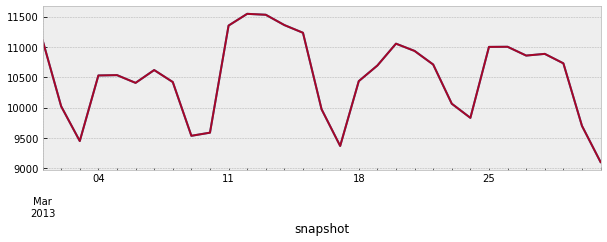

In [82]:
n.loads_t.p_set.sum(axis=1).plot()
n.loads_t.p_set.sum(axis=1).plot(figsize=(10,3))

<AxesSubplot:xlabel='snapshot'>

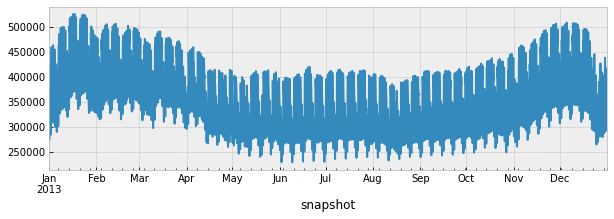

In [84]:
n37.loads_t.p_set.head()
n37.loads_t.p_set.sum(axis=1).plot(figsize=(10,3))

In [85]:
n.generators_t.p_max_pu.head()

,BE0 0 onwind,BE0 0 solar,BE0 1 onwind,BE0 1 solar,BE0 2 offwind-ac,BE0 2 offwind-dc,BE0 2 onwind,BE0 2 solar,BE0 3 onwind,BE0 3 solar,BE0 4 onwind,BE0 4 solar,BE0 5 onwind,BE0 5 solar
snapshot,,,,,,,,,,,,,,
2013-03-01,0.088989,0.043622,0.128104,0.060533,0.292438,0.379708,0.146632,0.075073,0.111580,0.046117,0.171621,0.050240,0.154531,0.046056
2013-03-02,0.017007,0.086105,0.036995,0.115712,0.078354,0.083224,0.037411,0.073877,0.023831,0.092921,0.055151,0.093684,0.046001,0.083086
2013-03-03,0.047045,0.054570,0.136013,0.120512,0.056955,0.055948,0.067368,0.063252,0.099670,0.098864,0.136924,0.136057,0.084675,0.085320
2013-03-04,0.259305,0.203100,0.660221,0.210009,0.406303,0.448631,0.316137,0.204679,0.437217,0.205442,0.575783,0.206008,0.303721,0.204549
2013-03-05,0.330508,0.190315,0.397850,0.193228,0.436222,0.392491,0.412328,0.187874,0.505122,0.190390,0.518422,0.187272,0.402053,0.184433


<AxesSubplot:xlabel='snapshot'>

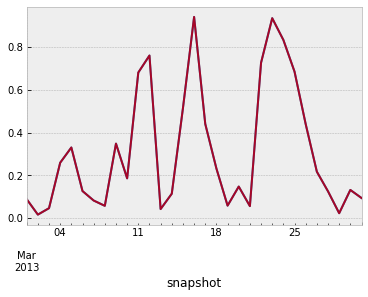

In [93]:
n.generators_t.p_max_pu.loc["2013-03", "BE0 0 onwind"].plot()
n.generators_t.p_max_pu.loc["2013":"2014", "BE0 0 onwind"].plot()

In [94]:
n37.generators_t.p_max_pu.head()

,AL1 0 offwind-ac,AL1 0 onwind,AL1 0 ror,AL1 0 solar,AT1 0 onwind,AT1 0 ror,AT1 0 solar,BA1 0 onwind,BA1 0 solar,BE1 0 offwind-ac,...,SE2 0 onwind,SE2 0 ror,SE2 0 solar,SI1 0 offwind-ac,SI1 0 onwind,SI1 0 ror,SI1 0 solar,SK1 0 onwind,SK1 0 ror,SK1 0 solar
snapshot,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,0.007089,0.001534,0.287988,0.0,0.039697,0.319752,0.0,0.006925,0.0,0.885500,...,0.456534,0.614558,0.0,0.0,0.083083,0.361519,0.0,0.405455,0.085513,0.0
2013-01-01 01:00:00,0.004447,0.000000,0.287961,0.0,0.038190,0.319629,0.0,0.007303,0.0,0.885500,...,0.460441,0.613134,0.0,0.0,0.080021,0.361493,0.0,0.415314,0.085364,0.0
2013-01-01 02:00:00,0.000000,0.000000,0.287951,0.0,0.029724,0.319530,0.0,0.007268,0.0,0.881466,...,0.460908,0.612455,0.0,0.0,0.080771,0.361420,0.0,0.432639,0.085328,0.0
2013-01-01 03:00:00,0.000000,0.000000,0.288079,0.0,0.018606,0.319457,0.0,0.004587,0.0,0.810949,...,0.459298,0.611459,0.0,0.0,0.079312,0.361440,0.0,0.440246,0.085528,0.0
2013-01-01 04:00:00,0.000000,0.000000,0.288156,0.0,0.015562,0.319406,0.0,0.003591,0.0,0.626880,...,0.451921,0.610764,0.0,0.0,0.071317,0.361415,0.0,0.463734,0.085647,0.0


# Exploring output data

## Total system costs

In [100]:
#dir(n)
n.objective / 1e9  #billion euros p.a.

0.3781785760058054

# Transmission line expansion 

In [107]:
# plotting lines (after solve)
n.lines.s_nom_opt

name
1    3539.8712
2    3396.2052
3    3396.2052
4    6792.4104
5    3396.2052
6    3396.2052
7       0.0000
Name: s_nom_opt, dtype: float64

In [108]:
#computing reinforcement as difference between optimal and initial state:
n.lines.s_nom_opt - n.lines.s_nom

name
1    143.665977
2     -0.000023
3     -0.000023
4     -0.000047
5     -0.000023
6     -0.000023
7      0.000000
dtype: float64

# Generators/Storage capacity

In [122]:
#n.generators.p_nom
#n.generators.p_nom_opt - n.generators.p_nom
n.generators.groupby("carrier").p_nom_opt.sum() 
#n.generators.groupby("carrier").p_nom_opt.sum() - n.generators.groupby("carrier").p_nom.sum()

carrier
CCGT           4892.300000
OCGT           3134.697400
coal            512.596948
offwind-ac        0.000000
offwind-dc     1440.704600
onwind         8796.823280
solar         17966.662050
Name: p_nom_opt, dtype: float64

In [132]:
n.storage_units.groupby("carrier").p_nom_opt.sum() 
n.stores.groupby("carrier").sum()

,e_nom_extendable,e_cyclic,capital_cost,marginal_cost,e_nom,e_nom_min,e_nom_max,e_min_pu,e_max_pu,e_initial,e_initial_per_period,e_cyclic_per_period,p_set,q_set,sign,standing_loss,build_year,lifetime,e_nom_opt
carrier,,,,,,,,,,,,,,,,,,,
H2,6,6,405.777406,0.061653,0.0,0.0,inf,0.0,6.0,0.0,0,6,0.0,0.0,6.0,0.0,0,inf,0.0
battery,6,6,8091.195567,0.059723,0.0,0.0,inf,0.0,6.0,0.0,0,6,0.0,0.0,6.0,0.0,0,inf,0.0


In [140]:
n37.storage_units.groupby("carrier").p_nom.sum() 
#n37.storage_units.groupby("carrier").p_nom_opt.sum() 

carrier
PHS      61896.735000
hydro    96153.075434
Name: p_nom, dtype: float64

## Storage time series

<AxesSubplot:xlabel='snapshot'>

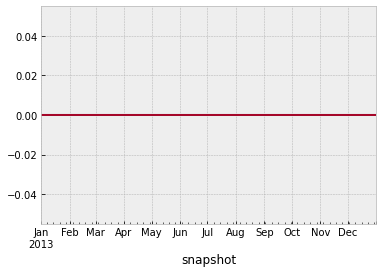

In [152]:
#n37.storage_units_t.state_of_charge.sum(axis=1)
#.resample('D').mean()
(n37.storage_units_t.state_of_charge.filter(like='battery', axis=1).sum(axis=1) / 1e6).plot()
(n37.storage_units_t.state_of_charge.filter(like='H2', axis=1).sum(axis=1) / 1e6).plot()

# Plotting network flows/congestions 

In [153]:
import cartopy.crs as ccrs

In [156]:
loading = (n.lines_t.p0.abs().mean().sort_index() / (n.lines.s_nom_opt * n.lines.s_max_pu).sort_index()).fillna(0.)
loading

name
1    0.635971
2    0.216845
3    0.331143
4    0.486629
5    0.319036
6    0.384248
7    0.000000
dtype: float64

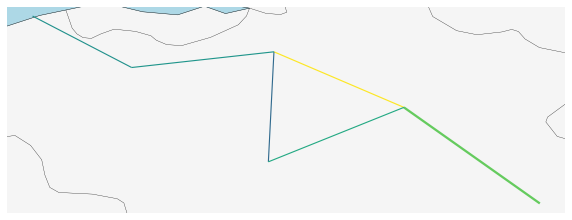

In [157]:
fix,ax = plt.subplots(
            figsize=(10,10),
            subplot_kw={"projection": ccrs.PlateCarree()}
            )

n.plot(ax=ax,
       bus_colors='gray',
       branch_components=['Line'],
       line_widths=n.lines.s_nom_opt/3e3,
       line_colors=loading,
       line_cmap=plt.cm.viridis,
       color_geomap=True,
       bus_sizes=0)

ax.axis('off');
       